In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import preprocessing
pd.set_option('display.max_columns', 100) # shows all the columns

In [2]:
features_all = pd.read_csv('All_Features.csv')

In [3]:
important = features_all[['Payment_Total', 'Hos_Stay_Total', 'RenalDisease', 'stroke',  'CDC_42731', 'CPC_66.0']]

In [4]:
important.describe()

,Payment_Total,Hos_Stay_Total,RenalDisease,stroke,CDC_42731,CPC_66.0
count,5.410000e+03,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,1.109516e+05,42.382994,20.304621,10.495564,3.722366,0.166543
std,2.927887e+05,136.305175,52.634207,27.171512,8.943683,0.663462
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.542500e+03,0.000000,2.000000,1.000000,0.000000,0.000000
50%,2.090000e+04,0.000000,6.000000,3.000000,1.000000,0.000000
75%,9.074650e+04,27.000000,18.000000,9.000000,4.000000,0.000000
max,6.535476e+06,3052.000000,1447.000000,810.000000,236.000000,11.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

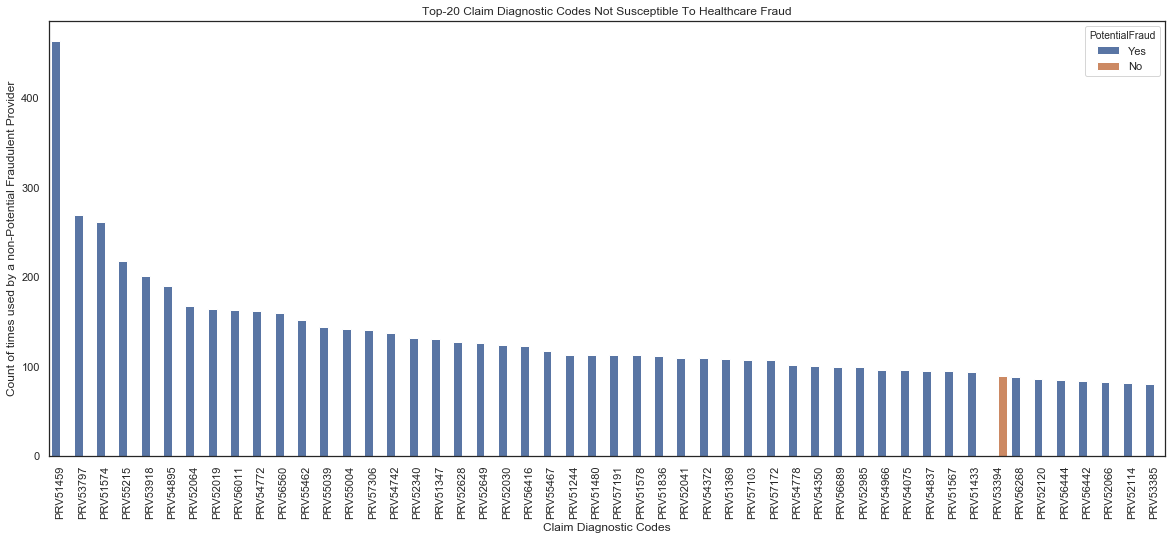

In [5]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
CDC_25000 = features_all.groupby(['Provider','PotentialFraud'])['CDC_25000'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'CDC_25000',0: 'Count'}).head(50)
sns.barplot(x='Provider',y='CDC_25000',hue='PotentialFraud', data=CDC_25000)
plt.title('Top-20 Claim Diagnostic Codes Not Susceptible To Healthcare Fraud')
plt.xlabel('Claim Diagnostic Codes')
plt.ylabel('Count of times used by a non-Potential Fraudulent Provider')
plt.xticks(rotation=90)

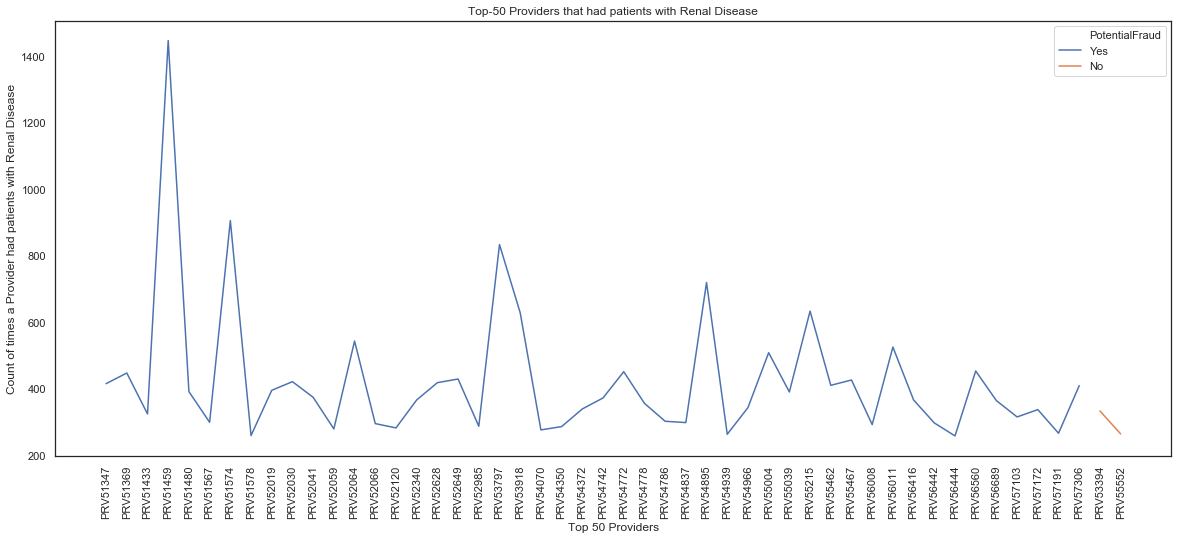

In [6]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
Renal_Disease = features_all.groupby(['Provider','PotentialFraud'])['RenalDisease'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'RenalDisease',0: 'Count'}).head(50)
sns.lineplot(x='Provider',y='RenalDisease',hue='PotentialFraud', data=Renal_Disease)
plt.title('Top-50 Providers that had patients with Renal Disease')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of times a Provider had patients with Renal Disease')
plt.xticks(rotation=90)
plt.show()

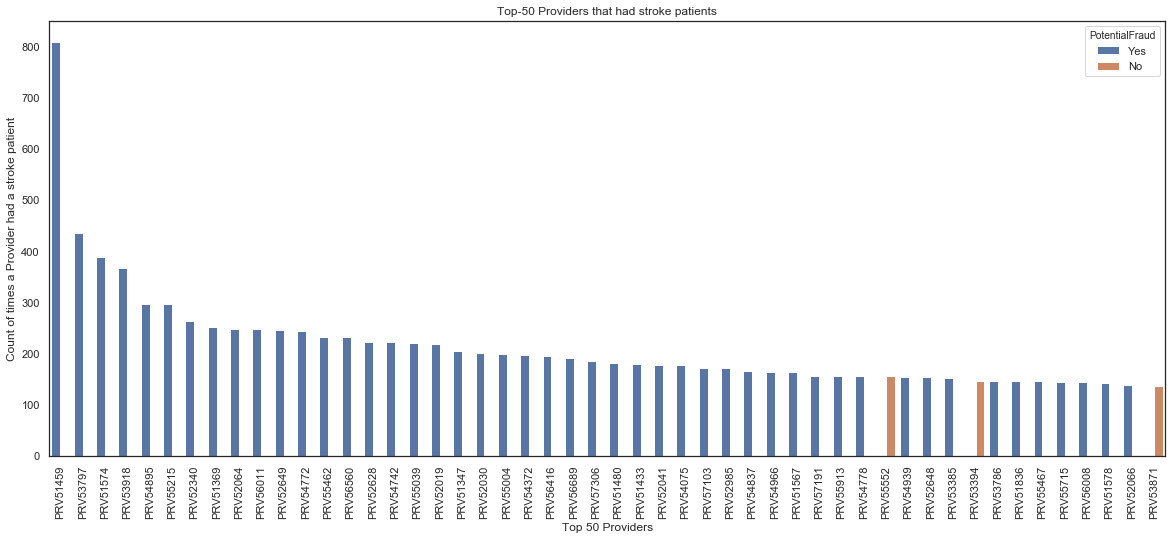

In [19]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
stroke1 = features_all.groupby(['Provider','PotentialFraud'])['stroke'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'stroke',0: 'Count'}).head(50)
sns.barplot(x='Provider',y='stroke',hue='PotentialFraud', data=stroke1)
plt.title('Top-50 Providers that had stroke patients')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of times a Provider had a stroke patient')
plt.xticks(rotation=90)
plt.show()

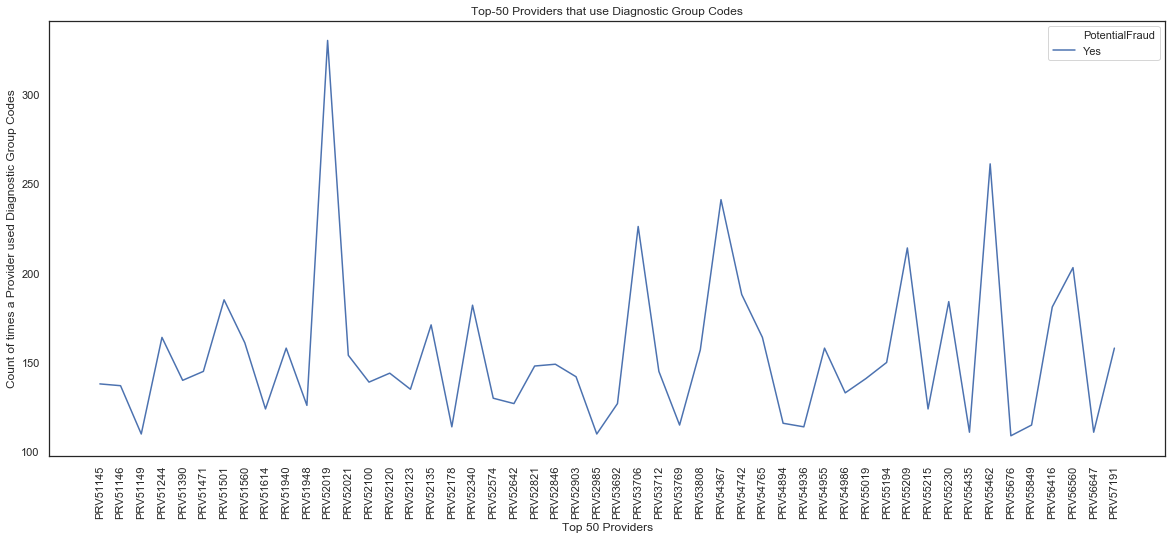

In [8]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
DiagGroupCode1 = features_all.groupby(['Provider','PotentialFraud'])['DiagGroupCode'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'DiagGroupCode',0: 'Count'}).head(50)
sns.lineplot(x='Provider',y='DiagGroupCode',hue='PotentialFraud', data=DiagGroupCode1)
plt.title('Top-50 Providers that use Diagnostic Group Codes')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of times a Provider used Diagnostic Group Codes')
plt.xticks(rotation=90)
plt.show()

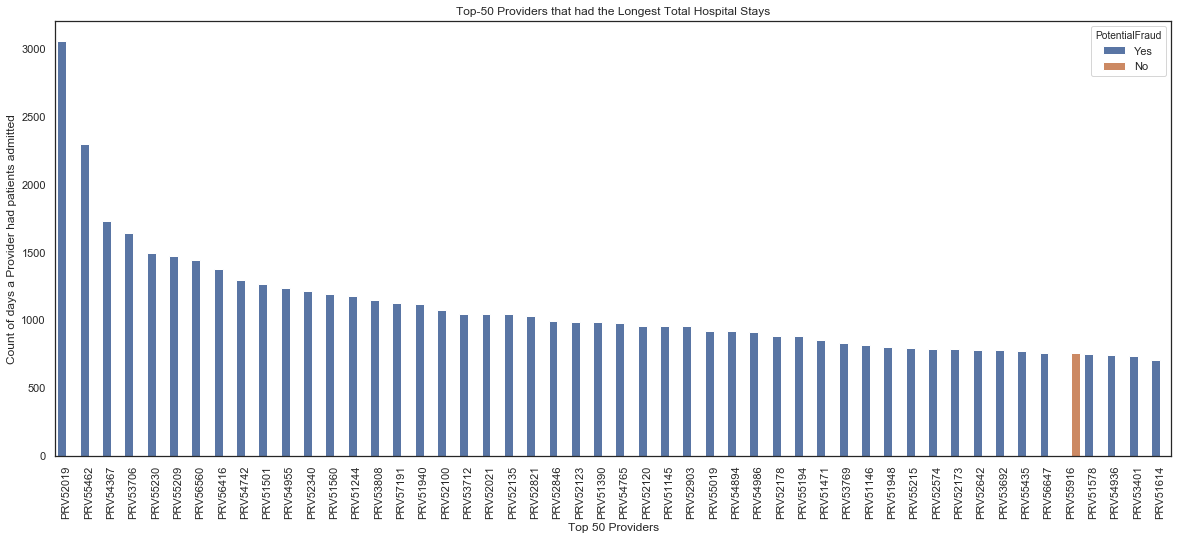

In [9]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
Hos_Stay_Total1 = features_all.groupby(['Provider','PotentialFraud'])['Hos_Stay_Total'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'Hos_Stay_Total',0: 'Count'}).head(50)
sns.barplot(x='Provider',y='Hos_Stay_Total',hue='PotentialFraud', data=Hos_Stay_Total1)
plt.title('Top-50 Providers that had the Longest Total Hospital Stays')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of days a Provider had patients admitted')
plt.xticks(rotation=90)
plt.show()

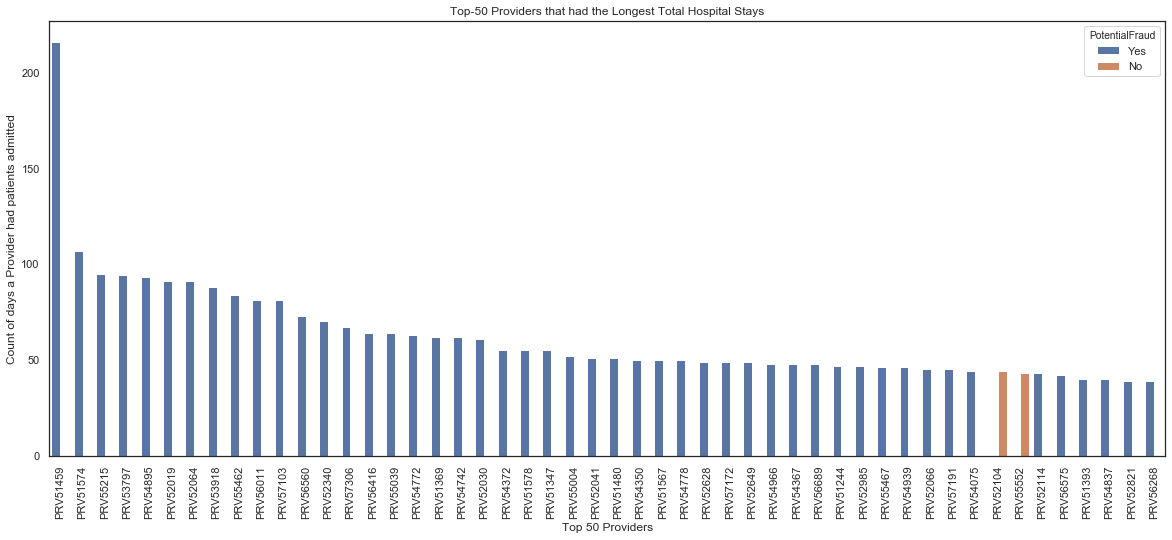

In [10]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
CDC_24491 = features_all.groupby(['Provider','PotentialFraud'])['CDC_2449'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'CDC_2449',0: 'Count'}).head(50)
sns.barplot(x='Provider',y='CDC_2449',hue='PotentialFraud', data=CDC_24491)
plt.title('Top-50 Providers that had the Longest Total Hospital Stays')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of days a Provider had patients admitted')
plt.xticks(rotation=90)
plt.show()

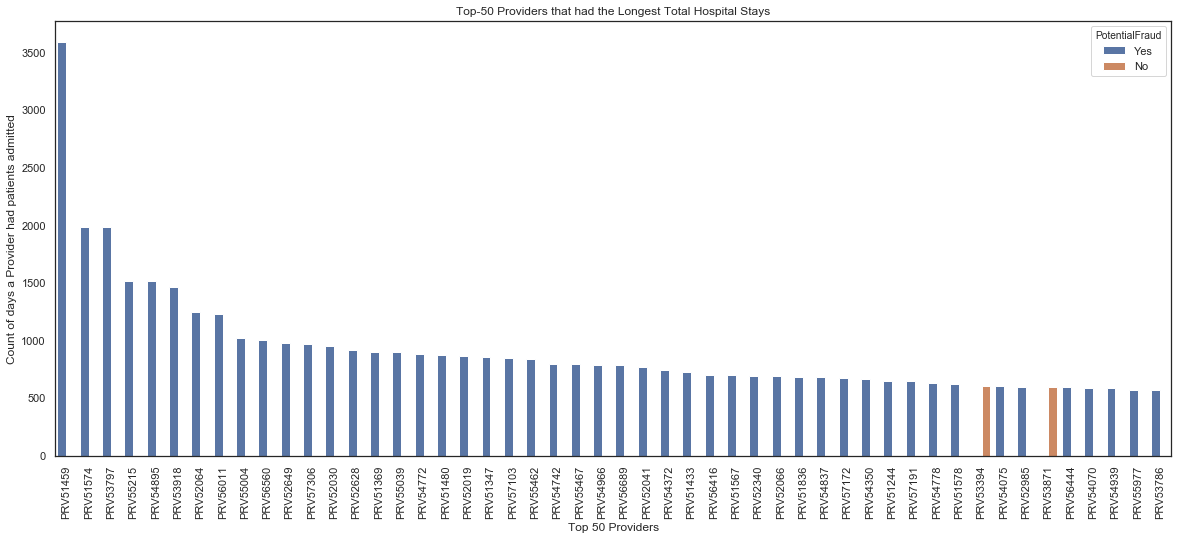

In [11]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
Depression1 = features_all.groupby(['Provider','PotentialFraud'])['Depression'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'Depression',0: 'Count'}).head(50)
sns.barplot(x='Provider',y='Depression',hue='PotentialFraud', data=Depression1)
plt.title('Top-50 Providers that had the Longest Total Hospital Stays')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of days a Provider had patients admitted')
plt.xticks(rotation=90)
plt.show()

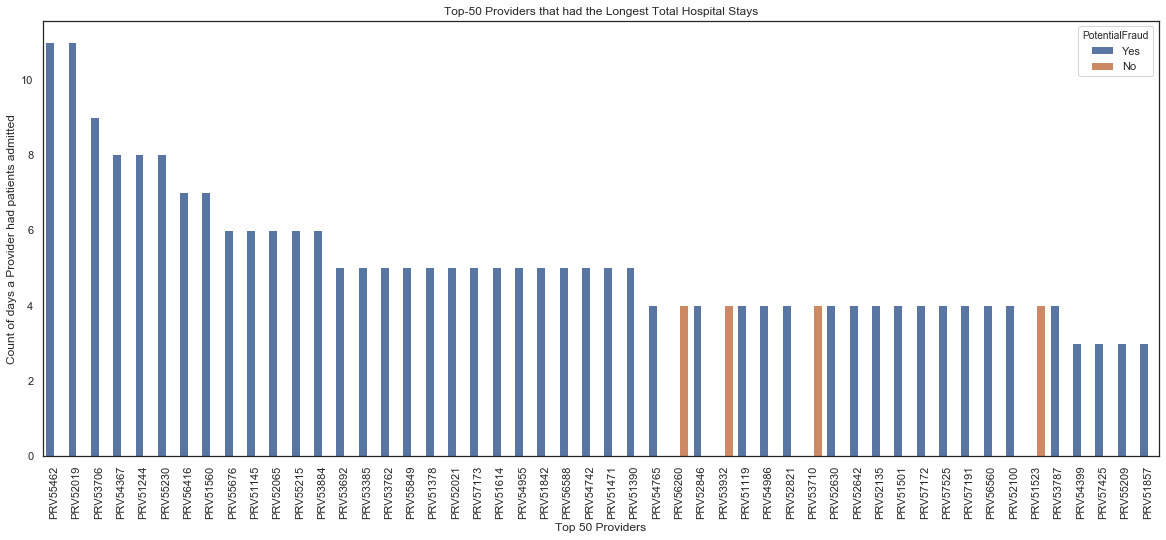

In [12]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
CPC_66 = features_all.groupby(['Provider','PotentialFraud'])['CPC_66.0'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'CPC_66.0',0: 'Count'}).head(50)
sns.barplot(x='Provider',y='CPC_66.0',hue='PotentialFraud', data=CPC_66)
plt.title('Top-50 Providers that had the Longest Total Hospital Stays')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of days a Provider had patients admitted')
plt.xticks(rotation=90)
plt.show()

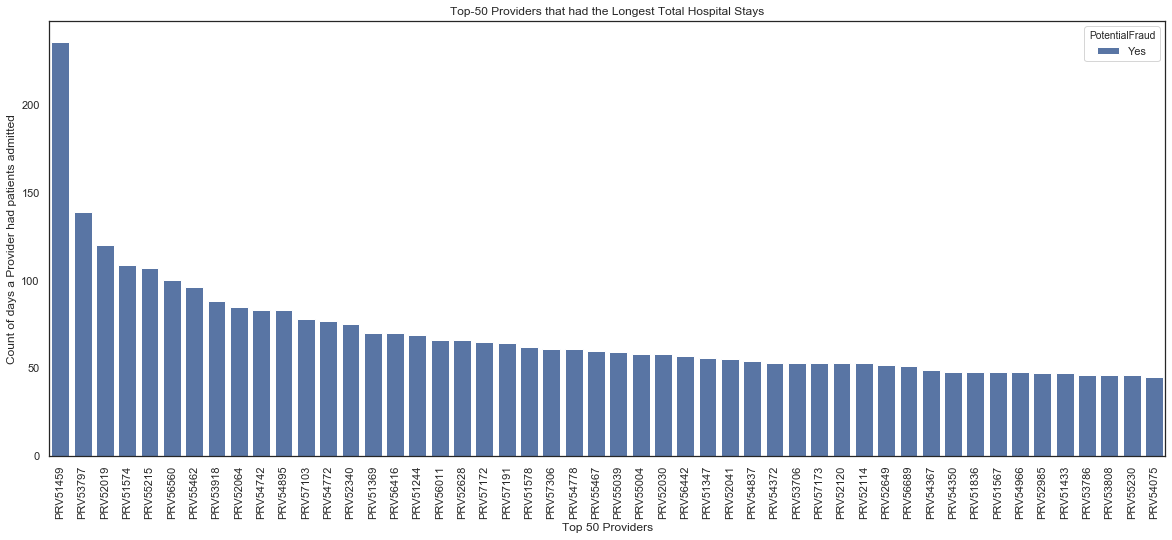

In [32]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
CDC_42731 = features_all.groupby(['Provider','PotentialFraud'])['CDC_42731'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'CDC_42731',0: 'Count'}).head(50)
sns.barplot(x='Provider',y='CDC_42731',hue='PotentialFraud', data=CDC_42731)
plt.title('Top-50 Providers that had the Longest Total Hospital Stays')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of days a Provider had patients admitted')
plt.xticks(rotation=90)
plt.show()

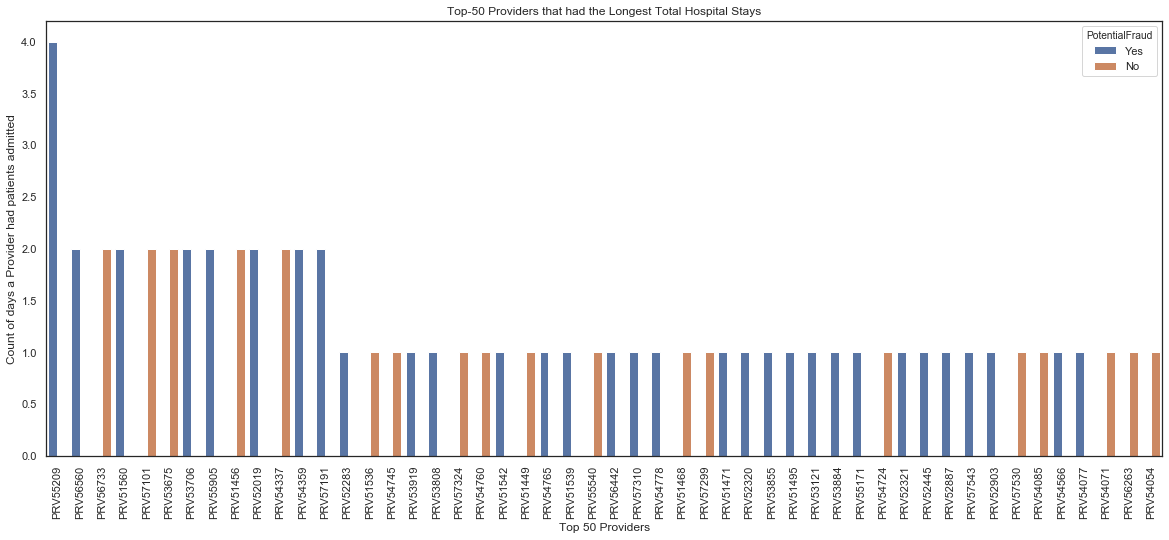

In [31]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
CDC_42731 = features_all.groupby(['Provider','PotentialFraud'])['DGC_183'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'DGC_183',0: 'Count'}).head(50)
sns.barplot(x='Provider',y='DGC_183',hue='PotentialFraud', data=CDC_42731)
plt.title('Top-50 Providers that had the Longest Total Hospital Stays')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of days a Provider had patients admitted')
plt.xticks(rotation=90)
plt.show()

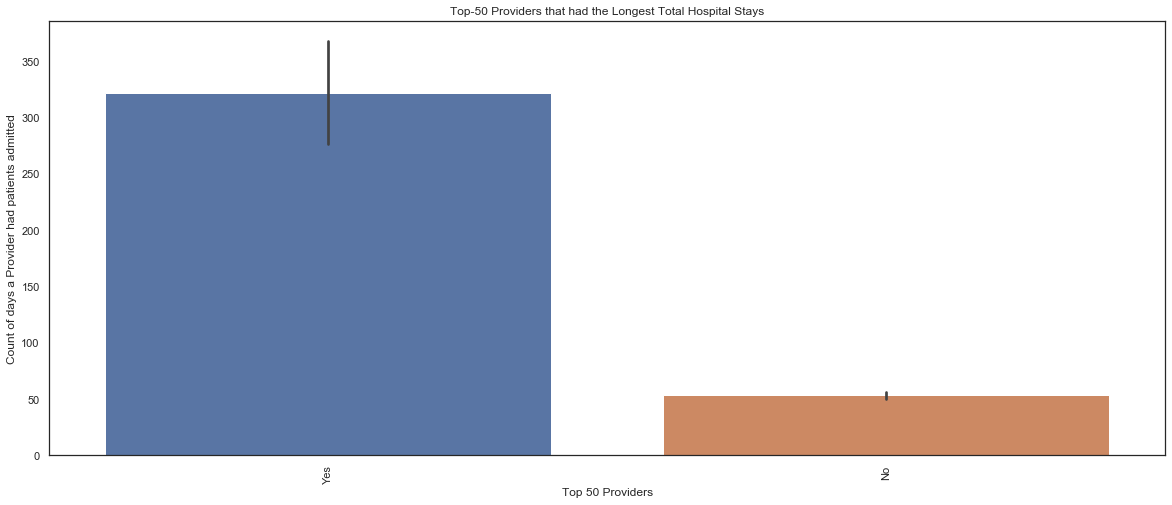

In [25]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
CDC_42731 = features_all.groupby(['Provider','PotentialFraud'])['IschemicHeart'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'IschemicHeart',0: 'Count'})
sns.barplot(x='PotentialFraud',y='IschemicHeart', data=CDC_42731)
plt.title('Top-50 Providers that had the Longest Total Hospital Stays')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of days a Provider had patients admitted')
plt.xticks(rotation=90)
plt.show()

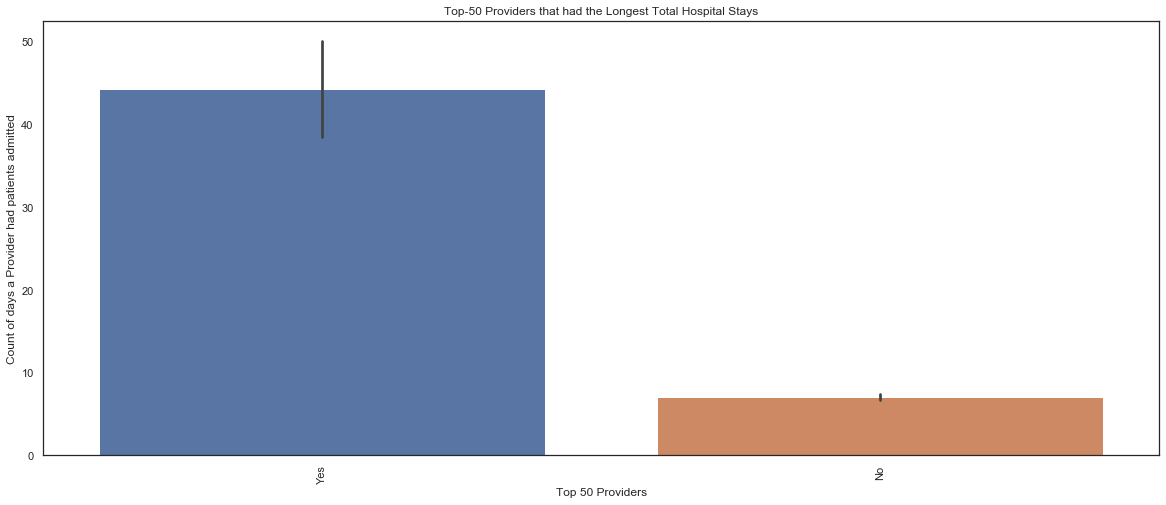

In [27]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
CDC_42731 = features_all.groupby(['Provider','PotentialFraud'])['stroke'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'stroke',0: 'Count'})
sns.barplot(x='PotentialFraud',y='stroke', data=CDC_42731)
plt.title('Top-50 Providers that had the Longest Total Hospital Stays')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of days a Provider had patients admitted')
plt.xticks(rotation=90)
plt.show()

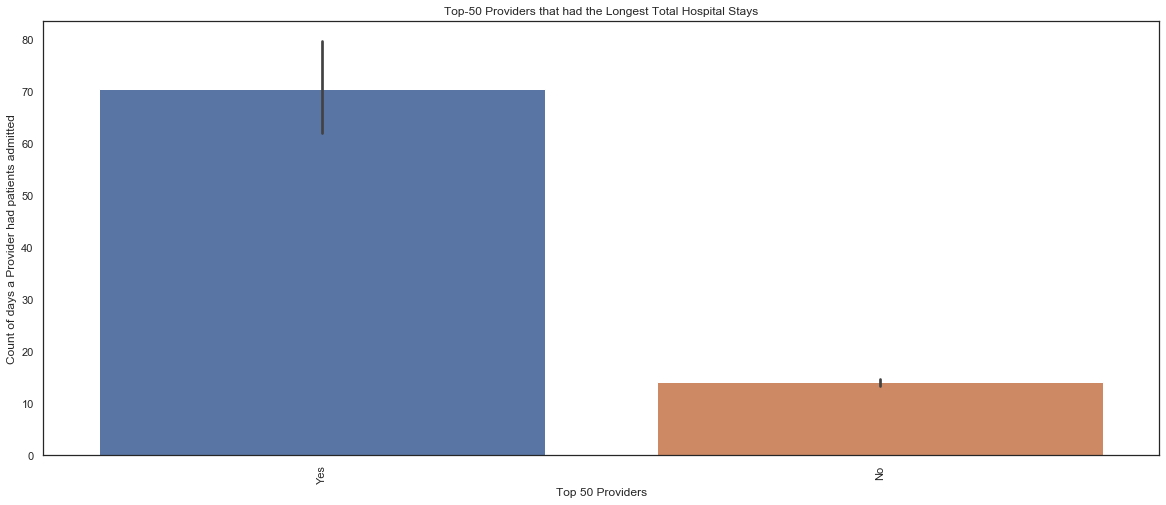

In [30]:

sns.set(rc={'figure.figsize':(20,8)},style='white')
CDC_42731 = features_all.groupby(['Provider','PotentialFraud'])['Age(81-100)'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'Age(81-100)',0: 'Count'})
sns.barplot(x='PotentialFraud',y='Age(81-100)', data=CDC_42731)
plt.title('Top-50 Providers that had the Longest Total Hospital Stays')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of days a Provider had patients admitted')
plt.xticks(rotation=90)
plt.show()

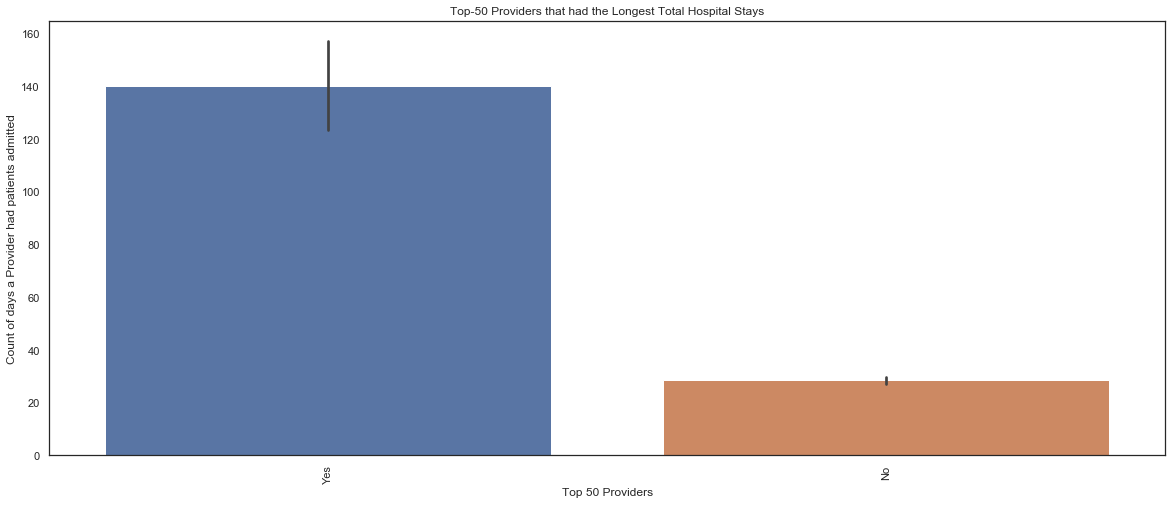

In [29]:
sns.set(rc={'figure.figsize':(20,8)},style='white')
CDC_42731 = features_all.groupby(['Provider','PotentialFraud'])['Age(61-80)'].sum(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={'index':'Age(61-80)',0: 'Count'})
sns.barplot(x='PotentialFraud',y='Age(61-80)', data=CDC_42731)
plt.title('Top-50 Providers that had the Longest Total Hospital Stays')
plt.xlabel('Top 50 Providers')
plt.ylabel('Count of days a Provider had patients admitted')
plt.xticks(rotation=90)
plt.show()